In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils
import keras
import matplotlib.pyplot as plt
import numpy as np

In [49]:
batch_size = 128
nb_classes = 10
nb_epoch = 100

In [50]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [51]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)

In [52]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="sigmoid", units=625, kernel_initializer="normal"))
model.add(Dense(input_dim=625, activation="sigmoid", units=625, kernel_initializer="normal"))
model.add(Dense(input_dim=625, activation="softmax", units=10, kernel_initializer="normal"))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 625)               490625    
_________________________________________________________________
dense_20 (Dense)             (None, 625)               391250    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                6260      
Total params: 888,135
Trainable params: 888,135
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Train
history = model.fit(X_train, Y_Train, epochs=nb_epoch, batch_size=batch_size, verbose=1,validation_data=(X_test,Y_Test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s - loss: 1.9070 - acc: 0.4219 - val_loss: 1.3159 - val_acc: 0.7155
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.9357 - acc: 0.7761 - val_loss: 0.6757 - val_acc: 0.8300
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.5887 - acc: 0.8479 - val_loss: 0.5055 - val_acc: 0.8653
Epoch 4/100
60000/60000 [==============================] - 1s - loss: 0.4728 - acc: 0.8716 - val_loss: 0.4234 - val_acc: 0.8851
Epoch 5/100
60000/60000 [==============================] - 1s - loss: 0.4175 - acc: 0.8838 - val_loss: 0.3821 - val_acc: 0.8921
Epoch 6/100
60000/60000 [==============================] - 1s - loss: 0.3858 - acc: 0.8903 - val_loss: 0.3607 - val_acc: 0.8992
Epoch 7/100
60000/60000 [==============================] - 1s - loss: 0.3647 - acc: 0.8956 - val_loss: 0.3412 - val_acc: 0.9010
Epoch 8/100
60000/60000 [=============================

60000/60000 [==============================] - 1s - loss: 0.1659 - acc: 0.9527 - val_loss: 0.1686 - val_acc: 0.9506
Epoch 65/100
60000/60000 [==============================] - 1s - loss: 0.1638 - acc: 0.9526 - val_loss: 0.1696 - val_acc: 0.9508
Epoch 66/100
60000/60000 [==============================] - 1s - loss: 0.1616 - acc: 0.9536 - val_loss: 0.1719 - val_acc: 0.9503
Epoch 67/100
60000/60000 [==============================] - 1s - loss: 0.1594 - acc: 0.9550 - val_loss: 0.1639 - val_acc: 0.9516
Epoch 68/100
60000/60000 [==============================] - 2s - loss: 0.1576 - acc: 0.9542 - val_loss: 0.1636 - val_acc: 0.9526
Epoch 69/100
60000/60000 [==============================] - 1s - loss: 0.1558 - acc: 0.9551 - val_loss: 0.1638 - val_acc: 0.9523
Epoch 70/100
60000/60000 [==============================] - 1s - loss: 0.1538 - acc: 0.9560 - val_loss: 0.1649 - val_acc: 0.9523
Epoch 71/100
60000/60000 [==============================] - 1s - loss: 0.1516 - acc: 0.9564 - val_loss: 0.1578

In [54]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

 9632/10000 [===========================>..] - ETA: 0s
Summary: Loss over the test dataset: 0.12, Accuracy: 0.96


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


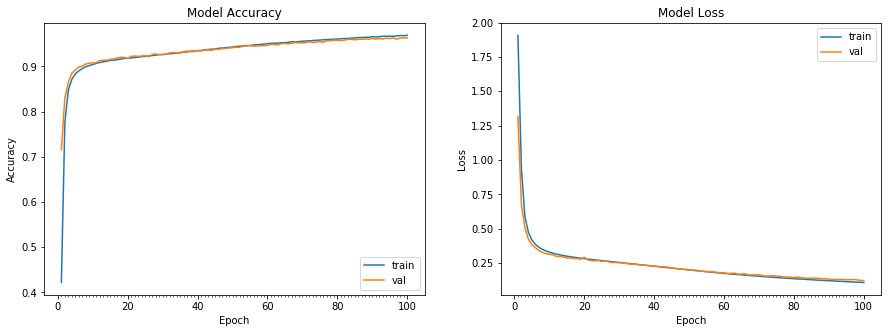

In [55]:
# list all data in history
print(history.history.keys())
plot_model_history(history)